# Preprocessing train data

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
data = pd.read_csv("train.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      float64
 17  hq              float64
 18  music           float64
 19  level_group     object 
dtypes: float64(9), int64(4), object(7)
memory usage: 2.0+ GB


## 1. Have an Overview of data

In [3]:
data.describe(include='all')

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
count,1.317421e+07,1.317421e+07,1.317421e+07,13174211,13174211,1.317421e+07,284746.000000,1.213797e+07,1.213797e+07,1.213797e+07,1.213797e+07,1.000737e+06,4806891,9014563,13174211,4806945,0.0,0.0,0.0,13174211
unique,NaN,NaN,NaN,11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,594,127,19,126,NaN,NaN,NaN,3
top,NaN,NaN,NaN,navigate_click,undefined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,worker,tunic.historicalsociety.entry,tunic.historicalsociety.cage.confrontation,NaN,NaN,NaN,13-22
freq,NaN,NaN,NaN,5687896,6377305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178294,939555,1816202,333363,NaN,NaN,NaN,6746397
mean,2.113413e+16,6.526426e+02,3.846817e+06,NaN,NaN,1.219194e+01,3.157930,-5.493615e+01,-1.162997e+02,4.581144e+02,3.852363e+02,3.186237e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,5.665220e+14,6.275818e+02,2.701387e+07,NaN,NaN,6.499188e+00,2.064042,5.201468e+02,2.185912e+02,2.472144e+02,1.292879e+02,3.692265e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.009031e+16,0.000000e+00,0.000000e+00,NaN,NaN,0.000000e+00,0.000000,-1.992355e+03,-9.181587e+02,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.101031e+16,2.890000e+02,4.394300e+05,NaN,NaN,6.000000e+00,1.000000,-3.529376e+02,-2.128361e+02,2.690000e+02,3.040000e+02,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.104022e+16,5.960000e+02,1.013425e+06,NaN,NaN,1.300000e+01,3.000000,-1.116317e+01,-9.778151e+01,4.470000e+02,3.970000e+02,4.180000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.110051e+16,8.970000e+02,1.740050e+06,NaN,NaN,1.800000e+01,5.000000,2.963618e+02,2.268531e+01,6.630000e+02,4.710000e+02,1.266000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(data.head(100))

           session_id  index  elapsed_time      event_name       name  level  \
0   20090312431273200      0             0  cutscene_click      basic      0   
1   20090312431273200      1          1323    person_click      basic      0   
2   20090312431273200      2           831    person_click      basic      0   
3   20090312431273200      3          1147    person_click      basic      0   
4   20090312431273200      4          1863    person_click      basic      0   
..                ...    ...           ...             ...        ...    ...   
95  20090312431273200     95         98859    person_click      basic      2   
96  20090312431273200     96         99459    person_click      basic      2   
97  20090312431273200     97         99958    person_click      basic      2   
98  20090312431273200     98        100713    person_click      basic      2   
99  20090312431273200     99        101042  navigate_click  undefined      3   

    page  room_coor_x  room_coor_y  scr

## 2. Wipe out NA values

In [5]:
## drop those columns as NA
data = data.drop(['music','hq','fullscreen'], axis=1)
print(data.head())

          session_id  index  elapsed_time      event_name   name  level  page  \
0  20090312431273200      0             0  cutscene_click  basic      0   NaN   
1  20090312431273200      1          1323    person_click  basic      0   NaN   
2  20090312431273200      2           831    person_click  basic      0   NaN   
3  20090312431273200      3          1147    person_click  basic      0   NaN   
4  20090312431273200      4          1863    person_click  basic      0   NaN   

   room_coor_x  room_coor_y  screen_coor_x  screen_coor_y  hover_duration  \
0  -413.991405  -159.314686          380.0          494.0             NaN   
1  -413.991405  -159.314686          380.0          494.0             NaN   
2  -413.991405  -159.314686          380.0          494.0             NaN   
3  -413.991405  -159.314686          380.0          494.0             NaN   
4  -412.991405  -159.314686          381.0          494.0             NaN   

                            text    fqid          

In [6]:
data['elapsed_time'] = data['elapsed_time'].astype(np.uint32)
data['level'] = data['level'].astype(np.uint8)
data['room_coor_x'] = data['room_coor_x'].astype(np.float32)
data['room_coor_y'] = data['room_coor_y'].astype(np.float32)
data['screen_coor_x'] = data['screen_coor_x'].astype(np.float32)
data['screen_coor_y'] = data['screen_coor_y'].astype(np.float32)
data['hover_duration'] = data['hover_duration'].astype(np.float32)


columns_to_convert = ['session_id','event_name','name','page','text','fqid','room_fqid','text_fqid','level_group']

for column in columns_to_convert:
    data[column] = data[column].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13174211 entries, 0 to 13174210
Data columns (total 17 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      category
 1   index           int64   
 2   elapsed_time    uint32  
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            category
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  level_group     category
dtypes: category(9), float32(5), int64(1), uint32(1), uint8(1)
memory usage: 565.7 MB


## Great! Now we reduced 2.3 GB to 565 MB, saved around 77% memory space!


## 3. (Optional) Save data in new csv file. (ps: Now 2/3 of group member's laptop can finally open .csv file! )

In [42]:
data = reduce_mem(data)
data.to_csv('train2.csv', index=False)

NameError: name 'reduce_mem' is not defined

## EDA

In [52]:
targets = pd.read_csv("train_labels.csv")

In [53]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sb

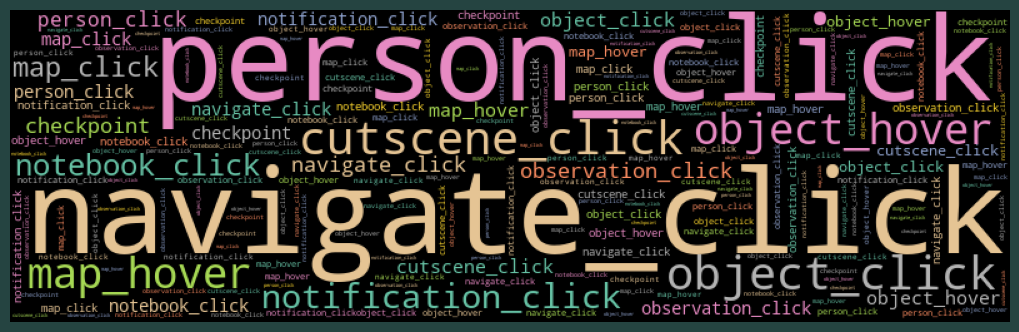

In [54]:
# Start with the eventname column
text = " ".join(x for x in data["event_name"])

# Create and generate a word cloud image:
wordcloud = WordCloud(width = 800, height = 250, 
            background_color ="black",colormap="Set2",max_font_size=100, random_state = 1, stopwords =None,repeat= True, collocations=False).generate(text)
plt.figure(figsize = (10, 8),facecolor= "#254441") 

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

In [55]:
# # Define a function to plot word cloud
# def plot_cloud(wordcloud):
#     # Set figure size
#     plt.figure(figsize=(40, 30))
#     # Display image
#     plt.imshow(wordcloud) 
#     # No axis details
#     plt.axis("off");

In [56]:
# # Import packages
# # import numpy as np
# from PIL import Image
# # Import image to np.array
# mask = np.array(Image.open('upvote.png'))
# # Generate wordcloud
# wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = None, mask=mask).generate(text)
# # Plot
# plot_cloud(wordcloud)

In [57]:
data.corr()

,index,elapsed_time,level,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
index,1.000000,0.076249,0.572491,-0.005838,-0.135469,0.024571,0.025236,-0.002589
elapsed_time,0.076249,1.000000,0.089829,-0.003381,-0.019823,0.000277,0.001249,0.012441
level,0.572491,0.089829,1.000000,-0.048371,-0.238521,0.031491,0.047835,-0.003141
room_coor_x,-0.005838,-0.003381,-0.048371,1.000000,0.078846,0.688065,-0.174714,NaN
room_coor_y,-0.135469,-0.019823,-0.238521,0.078846,1.000000,0.091298,-0.776146,NaN
screen_coor_x,0.024571,0.000277,0.031491,0.688065,0.091298,1.000000,-0.124072,NaN
screen_coor_y,0.025236,0.001249,0.047835,-0.174714,-0.776146,-0.124072,1.000000,NaN
hover_duration,-0.002589,0.012441,-0.003141,NaN,NaN,NaN,NaN,1.000000


                   index  elapsed_time     level  room_coor_x  room_coor_y  \
index           1.000000      0.076249  0.572491    -0.005838    -0.135469   
elapsed_time    0.076249      1.000000  0.089829    -0.003381    -0.019823   
level           0.572491      0.089829  1.000000    -0.048371    -0.238521   
room_coor_x    -0.005838     -0.003381 -0.048371     1.000000     0.078846   
room_coor_y    -0.135469     -0.019823 -0.238521     0.078846     1.000000   
screen_coor_x   0.024571      0.000277  0.031491     0.688065     0.091298   
screen_coor_y   0.025236      0.001249  0.047835    -0.174714    -0.776146   
hover_duration -0.002589      0.012441 -0.003141          NaN          NaN   

                screen_coor_x  screen_coor_y  hover_duration  
index                0.024571       0.025236       -0.002589  
elapsed_time         0.000277       0.001249        0.012441  
level                0.031491       0.047835       -0.003141  
room_coor_x          0.688065      -0.174714 

<AxesSubplot:>

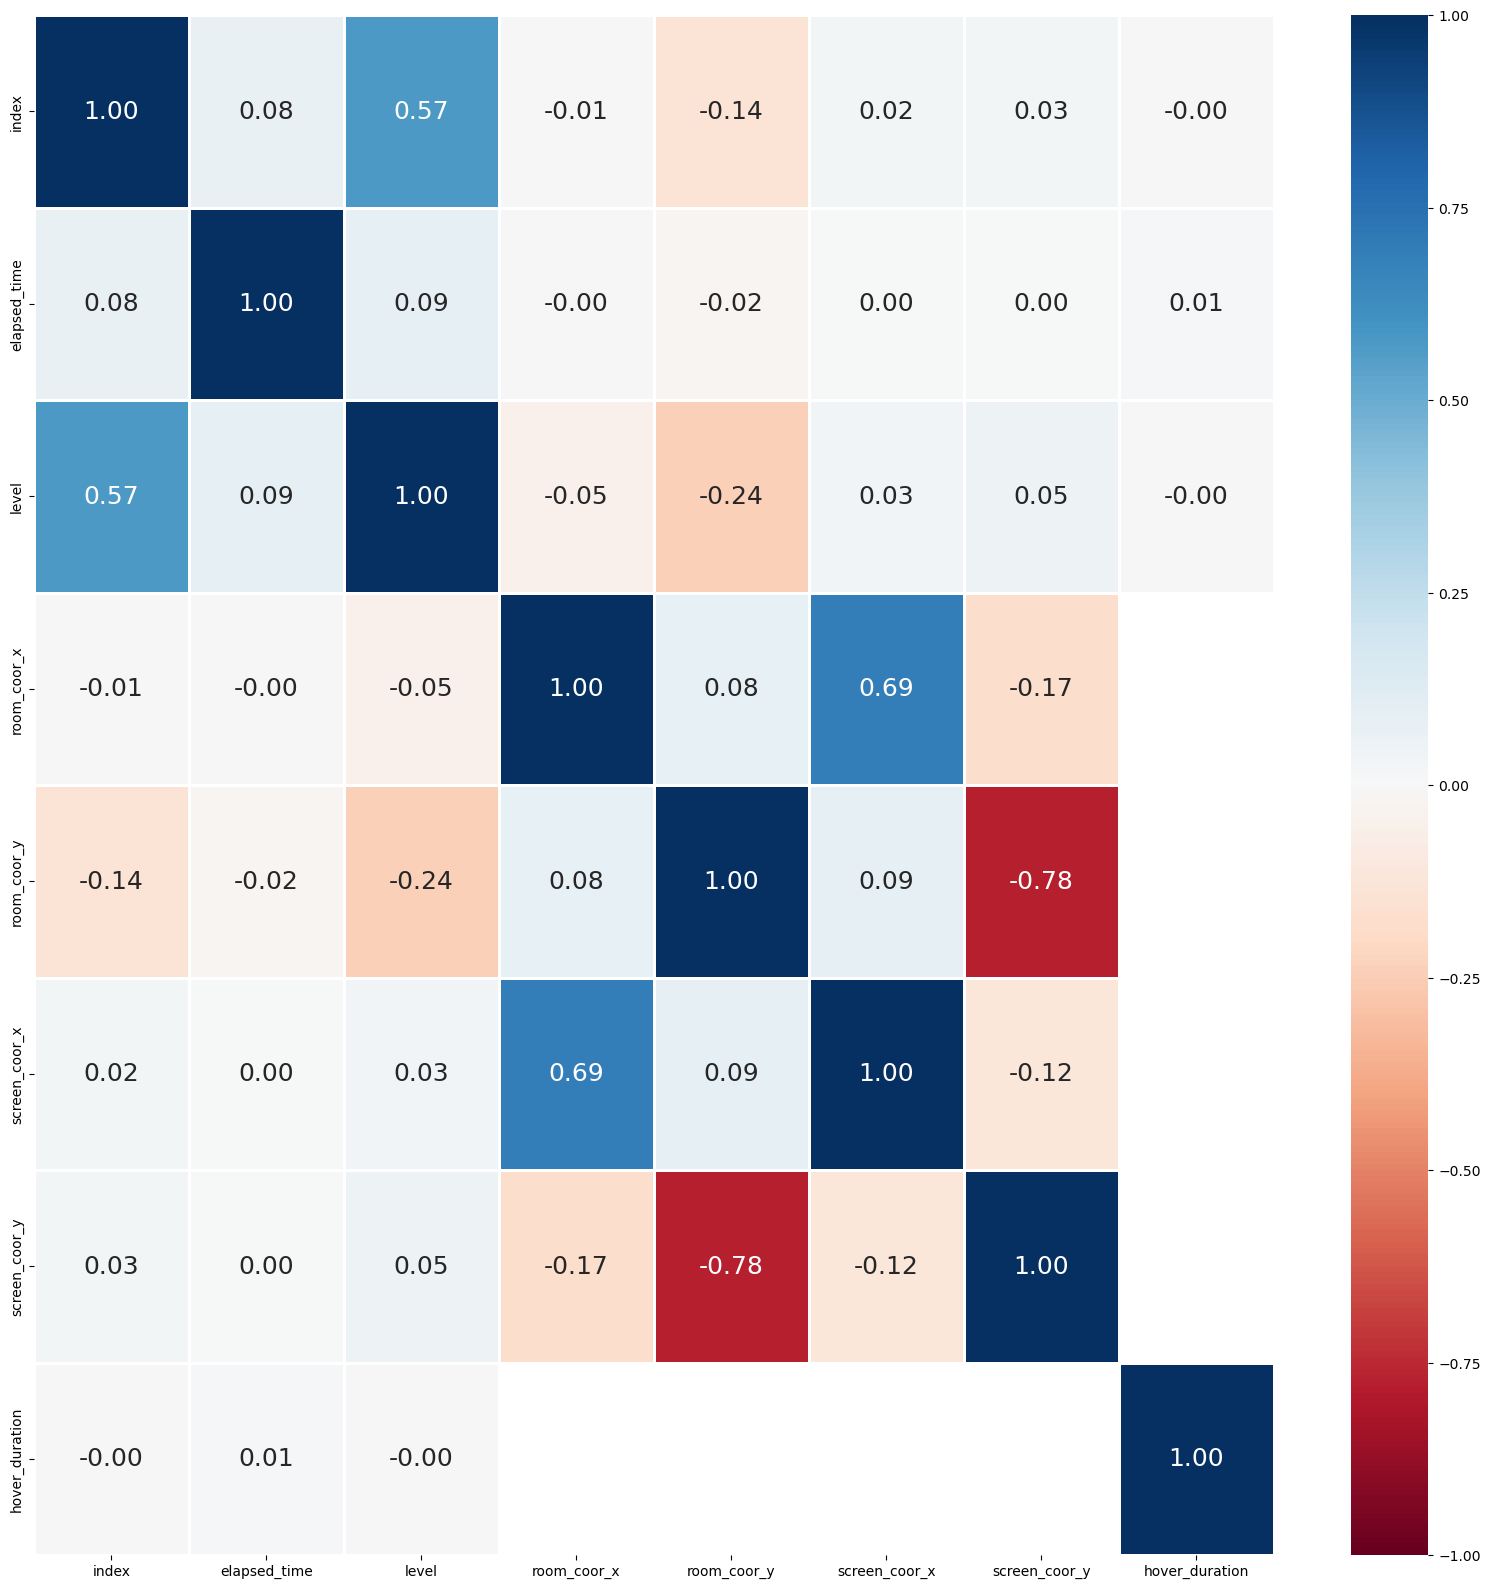

In [58]:
# Correlation Matrix
print(data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [59]:
targets["session"] = targets["session_id"].apply(lambda x:int(x.split('_')[0]))
targets["q"] = targets["session_id"].apply(lambda x:int(x.split('_')[1][1:]))
targets.head()

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090314121766812_q1,1,20090314121766812,1
3,20090314363702160_q1,1,20090314363702160,1
4,20090314441803444_q1,1,20090314441803444,1


## Average correct rate for each question

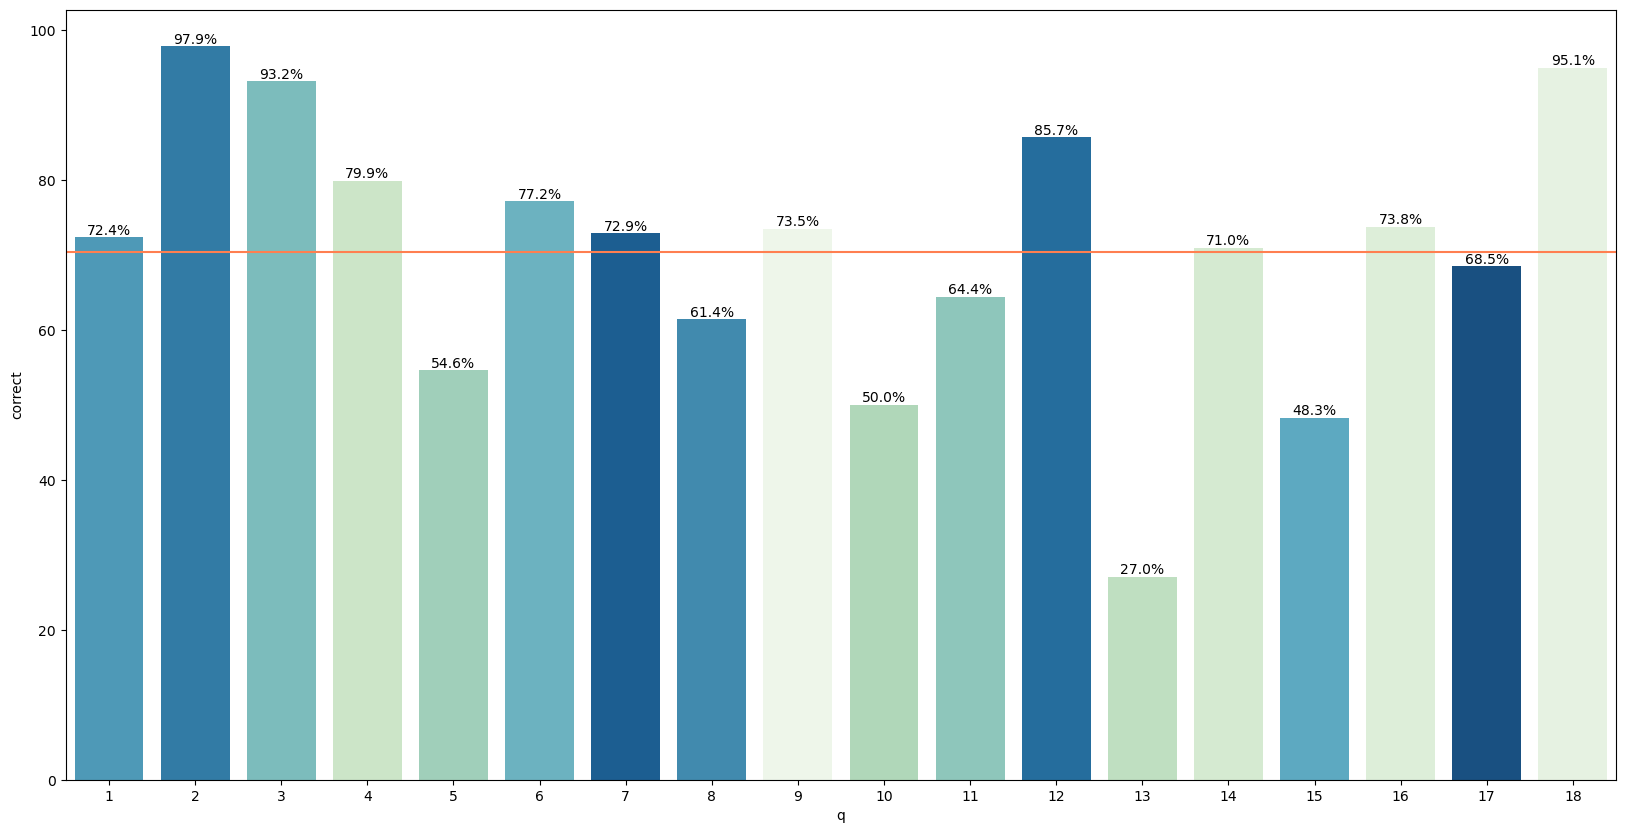

In [63]:
q_corr = targets.groupby("q")["correct"].mean().mul(100).to_frame().reset_index()
mean_correct = targets['correct'].mean()*100
pal = sb.color_palette("GnBu", len(q_corr))
rank = q_corr.sort_values('q')['correct'].argsort()
plt.figure(figsize=(20, 10))
g = sb.barplot(data=q_corr,x="q",y="correct",palette=np.array(pal[::])[rank])
g.bar_label(g.containers[0], fmt="%.1f%%")
g.axhline(mean_correct, color="coral")
del mean_correct,pal,rank,g,q_corr

## Number of correct answers in each level

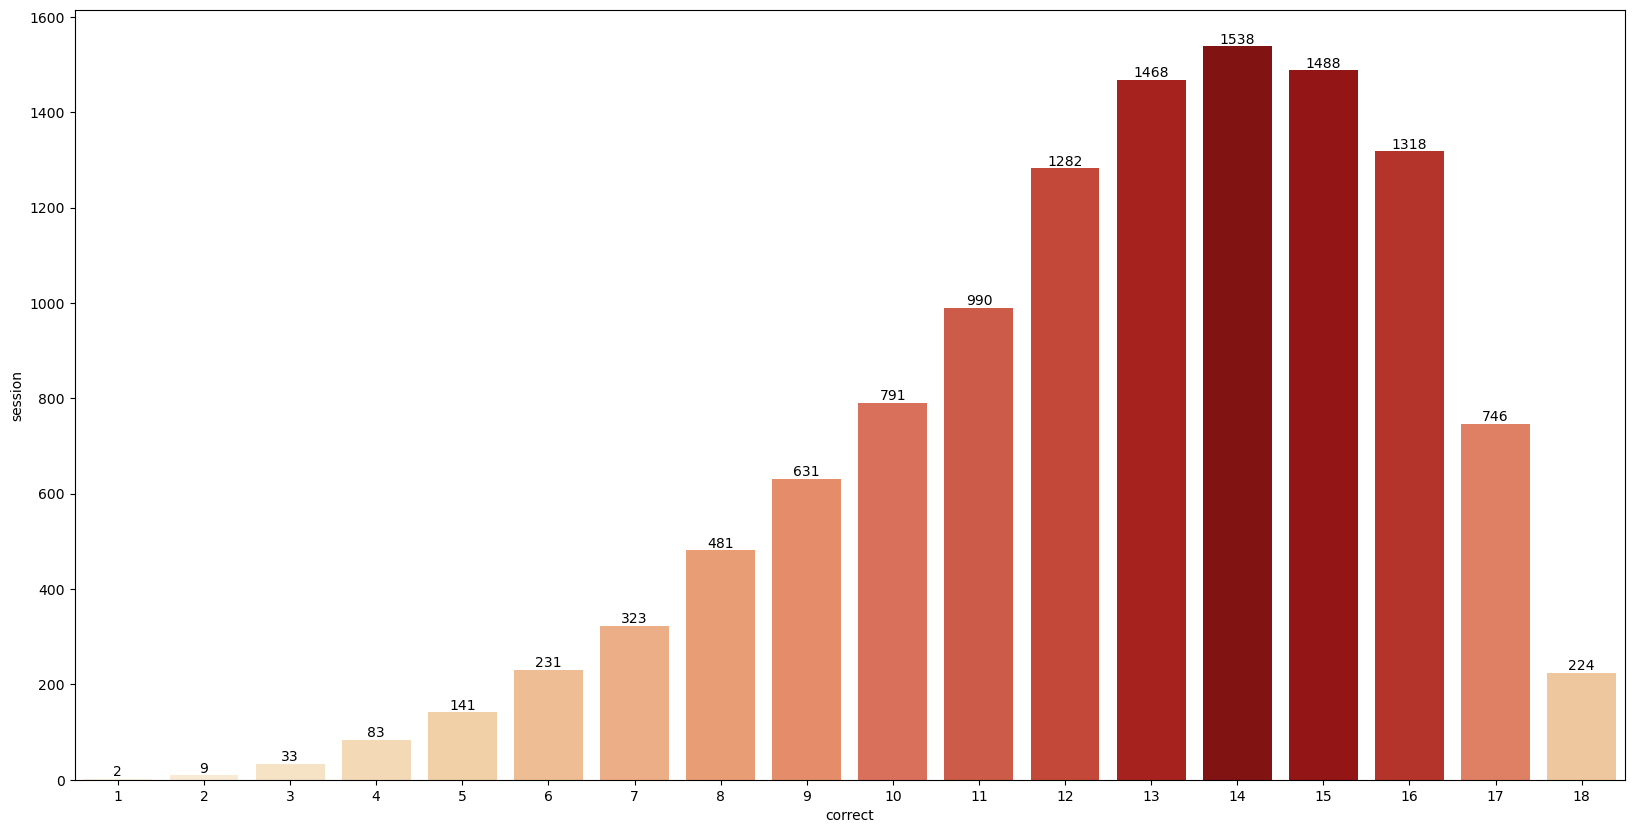

In [64]:
correct = targets[targets["correct"]==1]
session_correct = correct.groupby("session")["correct"].sum().to_frame().reset_index()
session_count = session_correct.groupby("correct")["session"].count().to_frame().reset_index()
pal = sb.color_palette("OrRd", len(session_count))
rank = session_count.sort_values('session')['correct'].argsort()
plt.figure(figsize=(20, 10))
g = sb.barplot(data=session_count,x="correct",y="session",palette=np.array(pal[::])[rank])
g.bar_label(g.containers[0])
del pal,g,correct,session_correct,session_count

## Average correct rate for each level

In [65]:
def generateLevelgroup(x):
    if x<=4:
        return "0-4"
    elif x<=12:
        return "5-12"
    else:
        return "13-22"
    
targets["level_group"] = targets["q"].apply(lambda x:generateLevelgroup(x))

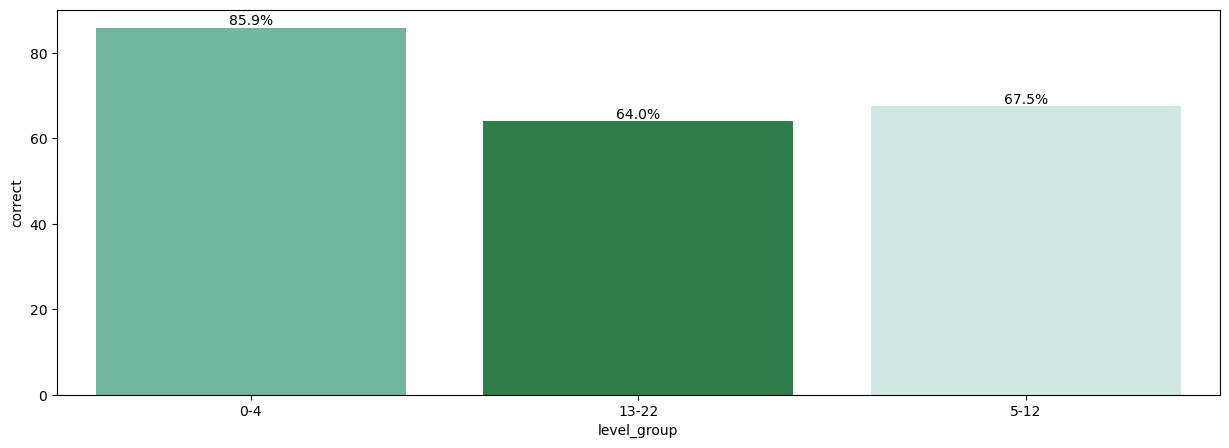

In [67]:
level_corr = targets.groupby("level_group")["correct"].mean().mul(100).to_frame().reset_index()
pal = sb.color_palette("BuGn",len(level_corr))
rank = level_corr.sort_values("level_group")["correct"].argsort()
plt.figure(figsize=(15,5))
g = sb.barplot(data=level_corr,x="level_group",y="correct",palette=np.array(pal[::])[rank],)
g.bar_label(g.containers[0],fmt="%.1f%%")
del level_corr,pal,rank,g